LIBRARIES

In [ ]:
#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplotlib for graphs
import matplotlib.pyplot as plt

# import sklearn PCA library 
from sklearn.decomposition import PCA

#import sklearn KMeans library
from sklearn.cluster import KMeans

#import libray for StandardScaler
from sklearn.preprocessing import StandardScaler

#import silhouette_score
from sklearn.metrics import silhouette_score

# import google colab file upload libraries 
import io
from google.colab import files 

# Import matplotlib library
import matplotlib.pyplot as plt

# Import library for classification report
from sklearn.metrics import classification_report

IMPORT DATASET

In [ ]:
# Upload Image File 
# Dataset loaded from: https://data.world/losangeles/los-angeles-crimes-2012-2015
uploaded = files.upload()

Saving Crimes_2012-2015_Crimes_2012-2015.csv to Crimes_2012-2015_Crimes_2012-2015 (1).csv


In [ ]:
# Read Uploaded File 
data = pd.read_csv(io.BytesIO(uploaded['Crimes_2012-2015_Crimes_2012-2015.csv']))

DATA EXPLORATION 

In [ ]:
# View the dataset
data.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/26/2013,130510483,05/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"


In [ ]:
# View the dataset columns
data.columns

Index(['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD',
       'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LOCATION',
       'Cross.Street', 'Location.1'],
      dtype='object')

DATA PRE-PROCESSING

In [ ]:
# check for null values
data.isnull().sum()

Date.Rptd            0
DR.NO                0
DATE.OCC             0
TIME.OCC             0
AREA                 0
AREA.NAME            0
RD                   0
Crm.Cd               0
CrmCd.Desc           2
Status               0
Status.Desc          0
LOCATION             0
Cross.Street    649466
Location.1        4397
dtype: int64

In [ ]:
# Drop null values
data = data.dropna()

In [ ]:
# Drop irrelevant columns from the dataset

data = data.drop(['Status','Status.Desc','DR.NO','Date.Rptd','AREA','RD','Crm.Cd','Cross.Street','LOCATION'],1)

In [ ]:
# Modified/Condensed dataset
data

,DATE.OCC,TIME.OCC,AREA.NAME,CrmCd.Desc,Location.1
0,03/20/2013,2015,Olympic,TRAFFIC DR #,"(34.0776, -118.308)"
1,03/10/2013,445,Hollywood,TRAFFIC DR #,"(34.1113, -118.3336)"
2,12/18/2013,745,Southeast,TRAFFIC DR #,"(33.9406, -118.2338)"
3,10/18/2013,1730,Southeast,TRAFFIC DR #,"(33.9449, -118.2332)"
5,05/22/2013,1145,77th Street,TRAFFIC DR #,"(33.9931, -118.3308)"
...,...,...,...,...,...
935208,01/01/2015,440,Topanga,TRAFFIC DR #,"(34.2038, -118.6081)"
935209,01/01/2015,1200,Topanga,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,"(34.1688, -118.6145)"
935210,01/01/2015,1130,Topanga,TRAFFIC DR #,"(34.1688, -118.6145)"
935211,01/01/2015,1225,Topanga,TRAFFIC DR #,"(34.2083, -118.5885)"


In [ ]:
# Check number of crimes in different areas
data['AREA.NAME'].value_counts()

77th Street    19613
Southwest      18137
Central        16988
Olympic        16565
Newton         16522
Hollywood      15851
Southeast      14567
Pacific        14218
Wilshire       14121
Rampart        13890
N Hollywood    13075
Van Nuys       12559
West LA        12472
Northeast      11651
Mission        11469
West Valley    11003
Devonshire     10555
Harbor         10345
Hollenbeck     10166
Topanga         9354
Foothill        9105
Name: AREA.NAME, dtype: int64

In [ ]:
# View the types of crime in the dataset with their count
crime_freq = data['CrmCd.Desc'].value_counts(ascending=True)

In [ ]:
# View the crime frequency
crime_freq

DISHONEST EMPLOYEE ATTEMPTED THEFT                     1
SHOTS FROM MOVING VEHICLE                              1
TILL TAP - PETTY ($950 & UNDER)                        1
HOMICIDE (NON-UCR)                                     1
DISHONEST EMPLOYEE - GRAND THEFT                       1
                                                   ...  
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     11793
VEHICLE - STOLEN                                   13841
ROBBERY                                            15037
BATTERY - SIMPLE ASSAULT                           15822
TRAFFIC DR #                                      156876
Name: CrmCd.Desc, Length: 146, dtype: int64

In [ ]:
data = data[data['CrmCd.Desc'] != 'TRAFFIC DR #']

In [ ]:
# Dividing/Segregating time of the day into Night, Morning, Afternoon, Evening
# Labeling the dataset as per the frequency of crime into attention 'low', 'Moderate', 'High' 
attention = []
latitude = []
longitude = []
time_of_day = []

for i in range(len(data)):
  row = data.iloc[i,:]
  
  coord = row['Location.1']
  cord_arr = coord.split(',')
  
  lat = cord_arr[0].split('(')[1]
  lon = cord_arr[1].split(')')[0]
  lon = lon.strip()

  latitude.append(float(lat))
  longitude.append(float(lon))

  time = row['TIME.OCC']
  time_of_day.append('')

  if time < 600:
    time_of_day[i] = 'Night'
  if time > 600 and time < 1200:
    time_of_day[i] = 'Morning'
  if time > 1200 and time < 1500:
    time_of_day[i] = 'Afternoon'
  if time > 1500 and time < 1800:
    time_of_day[i] = 'Evening'
  if time > 1800:
    time_of_day[i] = 'Night'
  
  crime_row_desc = row['CrmCd.Desc']
  attention.append(0)
  
  if crime_freq[crime_row_desc] > 4000 and crime_freq[crime_row_desc] < 12500:
    attention[i] = 1
  if crime_freq[crime_row_desc] > 12500:
    attention[i] = 2

In [ ]:
data['Attention'] = attention
data['Latitude'] = latitude
data['Longitude'] = longitude
data['Time'] = time_of_day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# View the data
data

,DATE.OCC,TIME.OCC,AREA.NAME,CrmCd.Desc,Location.1,Attention,Latitude,Longitude,Time
19,08/22/2014,1430,Southwest,THEFT PLAIN - PETTY ($950 & UNDER),"(34.0419, -118.2669)",1,34.0419,-118.2669,Afternoon
23,08/19/2014,1800,Mission,ROBBERY,"(34.2609, -118.4402)",2,34.2609,-118.4402,
30,02/20/2014,1630,Hollenbeck,BRANDISH WEAPON,"(34.0302, -118.2077)",0,34.0302,-118.2077,Evening
35,08/14/2014,820,Central,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0577, -118.2519)",0,34.0577,-118.2519,Morning
88,07/15/2014,1445,Northeast,BURGLARY FROM VEHICLE,"(34.1069, -118.2863)",1,34.1069,-118.2863,Afternoon
...,...,...,...,...,...,...,...,...,...
935181,01/01/2015,130,Olympic,BATTERY - SIMPLE ASSAULT,"(34.0443, -118.2892)",2,34.0443,-118.2892,Night
935202,01/01/2015,1200,Olympic,"SEX, UNLAWFUL","(34.0472, -118.309)",0,34.0472,-118.3090,
935204,01/01/2015,415,Topanga,ROBBERY,"(34.1938, -118.5928)",2,34.1938,-118.5928,Night
935209,01/01/2015,1200,Topanga,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,"(34.1688, -118.6145)",1,34.1688,-118.6145,


In [ ]:
freq = data['Attention'].value_counts()

In [ ]:
freq

2    44700
0    42322
1    38328
Name: Attention, dtype: int64

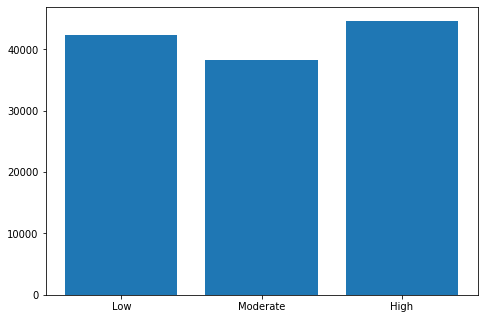

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
attention = ['Low', 'Moderate', 'High']
freq = [freq[0],freq[1],freq[2]]
ax.bar(attention,freq)
plt.show()

In [ ]:
time_freq = data['Time'].value_counts()

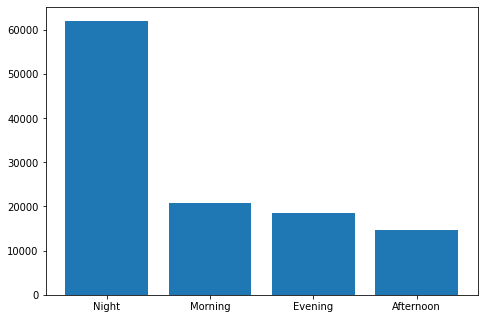

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
time = ['Night', 'Morning', 'Evening', 'Afternoon']
freq = [time_freq[0],time_freq[1],time_freq[2],time_freq[3]]
ax.bar(time,freq)
plt.show()

In [ ]:
# X = data[['Time','AREA NAME','Latitude','Longitude']]
X = data[['Time','AREA.NAME','Latitude','Longitude']]

# One Hot Encoding AREA NAME, and TIME
X = pd.get_dummies(X, columns=["AREA.NAME"], prefix=[""])
X = pd.get_dummies(X, columns=["Time"], prefix=[""])

# Target 
Y = data[['Attention']]

In [ ]:
# View X(features)
X

,Latitude,Longitude,_77th Street,_Central,_Devonshire,_Foothill,_Harbor,_Hollenbeck,_Hollywood,_Mission,_N Hollywood,_Newton,_Northeast,_Olympic,_Pacific,_Rampart,_Southeast,_Southwest,_Topanga,_Van Nuys,_West LA,_West Valley,_Wilshire,_,_Afternoon,_Evening,_Morning,_Night
19,34.0419,-118.2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
23,34.2609,-118.4402,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
30,34.0302,-118.2077,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
35,34.0577,-118.2519,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
88,34.1069,-118.2863,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935181,34.0443,-118.2892,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
935202,34.0472,-118.3090,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
935204,34.1938,-118.5928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
935209,34.1688,-118.6145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
#  0 => 'Low'
#  1 => 'Moderate'
#  2 => 'High'

In [ ]:
Y

,Attention
19,1
23,2
30,0
35,0
88,1
...,...
935181,2
935202,0
935204,2
935209,1


LINEAR REGRESSION

In [ ]:
#import sklearn linear regression model  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#import sklearn r sqaured and mean square error library 
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [ ]:
def regression(x,y):
    
# Train Test split using sklearn
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=34)
    
# Apply Linear Regression Model 
    model = LinearRegression()
    
# Fit X_train and y_train into the linear regression model 
    model.fit(X_train,y_train)
    
# Predict for X_test values
    predictions = model.predict(X_test)
    
# Calculate linear regression model score(R2) on training dataset
    train_score = model.score(X_train, y_train)
    print("Training score: ",train_score)
# Calculate linear regression model score(R2) on testing dataset
    test_score = model.score(X_test, y_test)
    print("Test score: ",test_score)

# The above training and testing scores are their respective R2 score only.
# Print other statistical measures to analyze the results
    print("R2 score: ",r2_score(y_test, predictions))

# For Example: R2 score of 0.626 i.e 62.6% signifies that there is 62.6% less variation around the line than the mean.
# Reference to learn about significance of R2 score: https://www.youtube.com/watch?v=2AQKmw14mHM
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    print("Mean Square Error: ",mse)
    print("Root Mean Square Error: ",rmse)

In [ ]:
# Apply linear regression
regression(X,Y)

Training score:  0.014414109760273575
Test score:  0.01332240085247316
R2 score:  0.01332240085247316
Mean Square Error:  0.6847974601647099
Root Mean Square Error:  0.8275249000270082


K NEAREST NEIGHBOUR(K-NN)

In [ ]:
# Apply K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define the model
knn = KNeighborsClassifier(n_neighbors=25)

# Train, test split the model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=34)

# Fit the model
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
# KNN score on Testing
testing_score = knn.score(X_test,y_test)
print(testing_score)

# KNN score on Training
training_score = knn.score(X_train,y_train)
print(training_score)

# Predicted Values
y_pred = knn.predict(X_test)
print(y_pred)

print("\n Classification Report \n",classification_report(y_test,y_pred))

0.3780880202100784
0.4606302353410451
[2 0 0 ... 1 0 0]

 Classification Report 
               precision    recall  f1-score   support

           0       0.37      0.42      0.40     12688
           1       0.35      0.28      0.31     11491
           2       0.40      0.43      0.41     13426

    accuracy                           0.38     37605
   macro avg       0.37      0.37      0.37     37605
weighted avg       0.38      0.38      0.38     37605



In [ ]:
error_rate = []
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(-1,1)
    error_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

Text(0, 0.5, 'Error Rate')

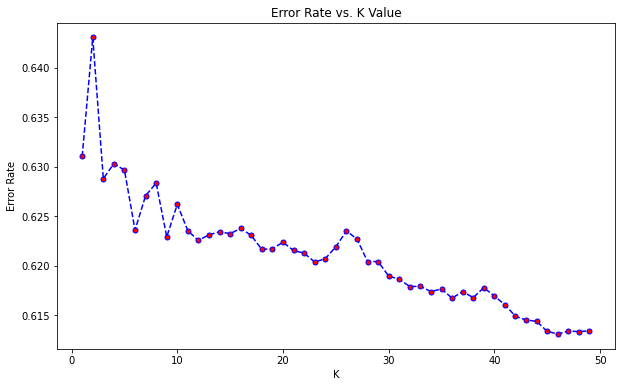

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

LOGISTIC REGRESSION

In [ ]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

# Prepare Logistic Regression Model
logisticRegr = LogisticRegression()

# Fit the Logistic Regression Model
logisticRegr.fit(X_train, y_train)

# Predict
predictions = logisticRegr.predict(X_test)

# Score
score = logisticRegr.score(X_test, y_test)
print(score)

print("\n Classification Report \n",classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38869831139476135

 Classification Report 
               precision    recall  f1-score   support

           0       0.38      0.44      0.41     12688
           1       0.36      0.07      0.12     11491
           2       0.40      0.61      0.48     13426

    accuracy                           0.39     37605
   macro avg       0.38      0.37      0.34     37605
weighted avg       0.38      0.39      0.35     37605



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CONVOLUTIONAL NEURAL NETWORK

In [ ]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.30, random_state=34)

# Define Convolutional Neural Network 
model = Sequential()
model.add(Dense(128, input_dim=28, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# CNN compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict 
predict = model.predict(X_test)
print(predict)

# Accuracy
Testing_Accuracy = model.evaluate(X_test,y_test)[1]
print(Testing_Accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3712      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 14,147
Trainable params: 14,147
Non-trainable params: 0
_________________________________________________________________
[[0.33010054 0.31003726 0.35986227]
 [0.33010054 0.31003726 0.35986227]
 [0.33010054 0.31003726 0.35986227]
 ...
 [0.33010054 0.31003726 0.35986227]
 [0.33010054 0.31003726 0.35986227]
 [0.39156696 0.29706857 0.31136444]]
1176/1176 [=================

In [ ]:
y_classes_cnn = [np.argmax(element) for element in predict]
y_classes_test = [np.argmax(element) for element in y_test]
# y_classes_test
print("\n Classification Report \n",classification_report(y_classes_test,y_classes_cnn))


 Classification Report 
               precision    recall  f1-score   support

           0       0.38      0.01      0.01     12688
           1       0.40      0.00      0.01     11491
           2       0.36      0.99      0.53     13426

    accuracy                           0.36     37605
   macro avg       0.38      0.33      0.18     37605
weighted avg       0.38      0.36      0.19     37605



Random Forest

In [ ]:
# Implement Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf = rf.fit(X, Y)
rf.score(X, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.6974710809732748

In [ ]:
predictions = rf.predict(X)

In [ ]:
print("\n Classification Report \n",classification_report(Y,predictions))


 Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70     42322
           1       0.70      0.66      0.68     38328
           2       0.69      0.73      0.71     44700

    accuracy                           0.70    125350
   macro avg       0.70      0.70      0.70    125350
weighted avg       0.70      0.70      0.70    125350

